In [80]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [81]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [82]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [85]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [86]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
len(train_df["Cabin"].value_counts())

147

In [89]:
len(train_df["Ticket"].value_counts())

681

In [90]:
train_df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)
test_df.drop(["Name", "Cabin", "Ticket"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [91]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


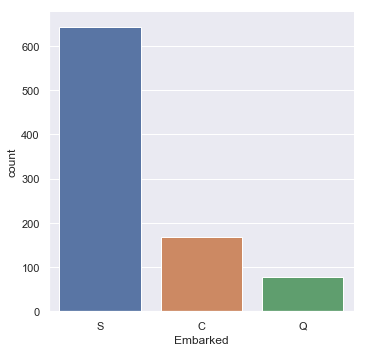

In [92]:
sns.factorplot(data=train_df, x="Embarked", kind="count")

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


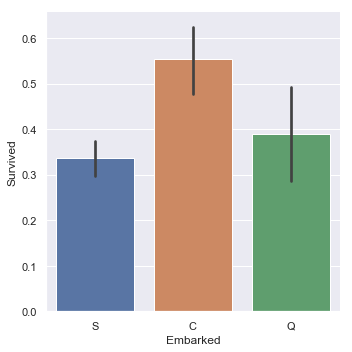

In [93]:
sns.factorplot(data=train_df, x="Embarked", y="Survived", kind="bar")

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


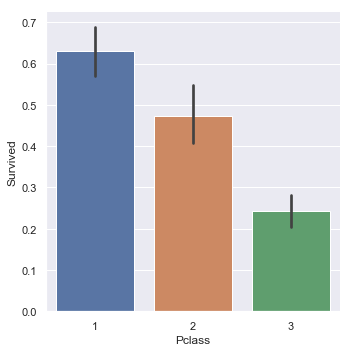

In [94]:
sns.factorplot(data=train_df, x="Pclass", y="Survived", kind="bar")

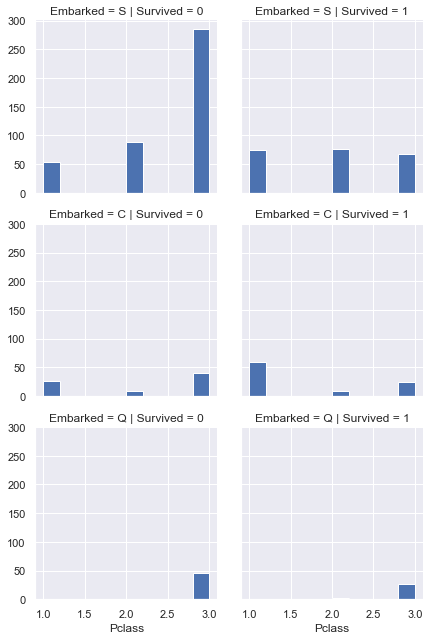

In [95]:
g = sns.FacetGrid(data=train_df, col="Survived", row="Embarked")
g.map(plt.hist, "Pclass")
g.add_legend()

In [96]:
age_count = train_df[["Age", "Survived"]].groupby(["Age"], as_index=False).mean()

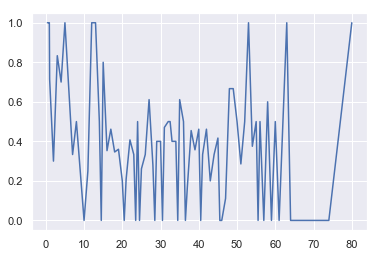

In [97]:
sns.set()
plt.plot(age_count["Age"], age_count["Survived"])

In [98]:
combine = [train_df, test_df]
for dataset in combine:
    dataset["Age"] = dataset["Age"].fillna(dataset["Age"].median())

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


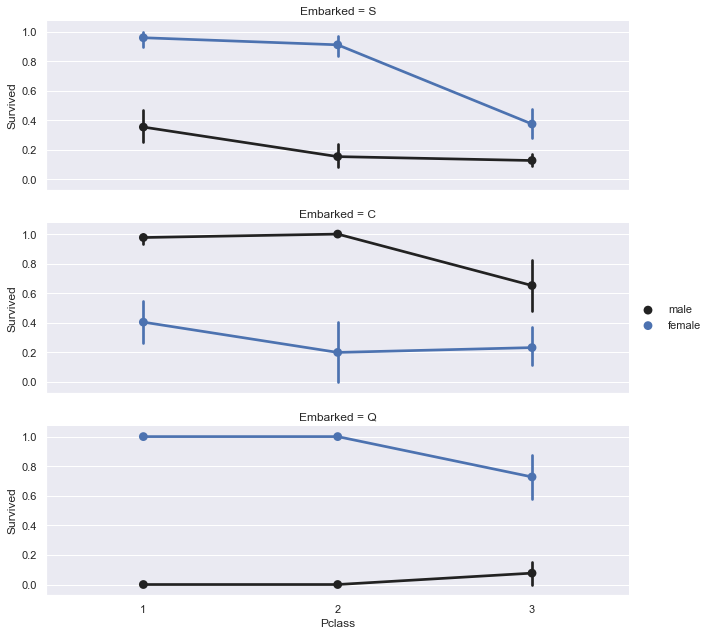

In [99]:
g = sns.FacetGrid(data=train_df, row="Embarked", aspect=3)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()

In [100]:
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [101]:
train_df["Embarked"] = train_df["Embarked"].fillna("S")
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


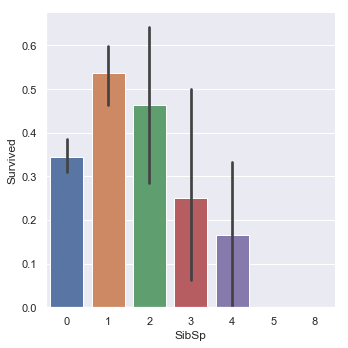

In [102]:
sns.factorplot(data=train_df, x="SibSp", y="Survived", kind="bar")

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


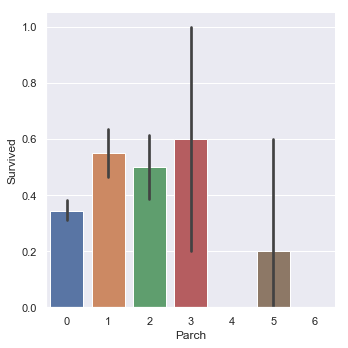

In [103]:
sns.factorplot(data=train_df, x="Parch", y="Survived", kind="bar")

In [104]:
combine = [train_df, test_df]
for dataset in combine:
    dataset["Alone"] = 0
    dataset["Alone"][(dataset["SibSp"] == 0) & (dataset["Parch"] == 0)] = 1

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [105]:
train_df["Alone"].value_counts()

1    537
0    354
Name: Alone, dtype: int64

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


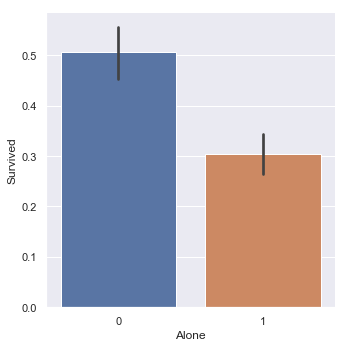

In [106]:
sns.factorplot(data=train_df, x="Alone", y="Survived", kind="bar")

In [107]:
train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
test_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [108]:
one_hot_train = pd.get_dummies(train_df)
one_hot_test = pd.get_dummies(test_df)
one_hot_train.head()

,Survived,Pclass,Age,Fare,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,0,1


In [109]:
X_train = one_hot_train.drop(["Survived"], axis=1)
y_train = one_hot_train["Survived"]
X_test = one_hot_test.drop(["PassengerId"], axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [122]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_test = sc.transform(X_test)

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
logreg = LogisticRegression()
logreg.fit(sc_train, y_train)
y_pred = logreg.predict(sc_test)
logreg.score(sc_train, y_train)

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7901234567901234

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(sc_train, y_train)
y_pred = knn.predict(sc_test)
knn.score(sc_train, y_train)

0.8821548821548821

In [125]:
svc = SVC()
svc.fit(sc_train, y_train)
y_pred = svc.predict(sc_test)
svc.score(sc_train, y_train)

0.8282828282828283

In [126]:
gnb = GaussianNB()
gnb.fit(sc_train, y_train)
y_pred = gnb.predict(sc_test)
gnb.score(sc_train, y_train)

0.7800224466891134

In [127]:
pct = Perceptron()
pct.fit(sc_train, y_train)
y_pred = pct.predict(sc_test)
pct.score(sc_train, y_train)

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7890011223344556

In [128]:
lsvc = LinearSVC()
lsvc.fit(sc_train, y_train)
y_pred = lsvc.predict(sc_test)
lsvc.score(sc_train, y_train)

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7934904601571269

In [129]:
sgd = SGDClassifier()
sgd.fit(sc_train, y_train)
y_pred = sgd.predict(sc_test)
sgd.score(sc_train, y_train)

C:\Users\nakajima.kaori\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.67003367003367

In [134]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(sc_train, y_train)
y_pred = rf.predict(sc_test)
rf.score(sc_train, y_train)

0.9797979797979798

In [139]:
# y_pred = rf.predict(sc_test)

In [144]:
# submission = pd.DataFrame({    
#     "PassengerId": test_df["PassengerId"],
#     "Survived": y_pred,
# })
# submission.to_csv('submission_v3.csv', index=False)